In [ ]:
import re
import sys
import pandas as pd
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from catboost import CatBoostRegressor
import numpy as np
from fastapi.responses import JSONResponse

sys.path.append('../')
from pipelines.scraper import scrape_car_data
from pipelines.preprocess_pipeline import data_processing
from pipelines.database_helpers import read_sql_query, setup_database
from sqlalchemy import MetaData, Table

from fastapi.middleware.cors import CORSMiddleware
import shap
from fastapi.responses import FileResponse


In [ ]:
import re
import sys
import matplotlib.pyplot as plt

import pandas as pd
import shap
#from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
from catboost import CatBoostRegressor
import numpy as np
#from fastapi.responses import JSONResponse

sys.path.append('../')
from pipelines.scraper import scrape_car_data
from pipelines.preprocess_pipeline import *
from pipelines.database_helpers import read_sql_query, setup_database

In [ ]:
from price_prediction_api.prediction_api import prediction_process

In [ ]:
# Use SQLAlchemy to reflect the table structure
engine = setup_database()


In [ ]:
# Load the model
model = CatBoostRegressor()
model.load_model('../models/car_price_predictor.cbm')

In [ ]:
model = CatBoostRegressor()
model.load_model("../models/car_price_predictor.cbm")

# Read new data from a database
query = f"""
SELECT ecd.link, "{'", "'.join(model.feature_names_)}"
FROM engineered_car_data ecd
LEFT  JOIN predicted_prices pp on pp.link = ecd.link
INNER JOIN car_openai_features oaf on oaf.link = ecd.link
LEFT JOIN car_links cl on ecd.link = cl.link
WHERE "price (HUF)" > 1000000 and "price (HUF)" < 100000000
AND cl.collected_at > '2024-07-21'
--AND  pp.predicted_price IS NULL;
"""

df = read_sql_query(engine, query)

In [10]:
categorical_features = list(df.select_dtypes(include=["object"]).columns)

In [11]:
# Handle missing values
for col in model.feature_names_:
    if col in categorical_features:
        df[col] = df[col].fillna('missing')
    else:
        df[col] = df[col].fillna(np.nan)

In [12]:
df = df[model.feature_names_]

In [13]:
# Initialize explainer (do this only once after loading the model)
explainer = shap.Explainer(model)

In [14]:
# Compute SHAP values for the DataFrame
shap_values = explainer(df)

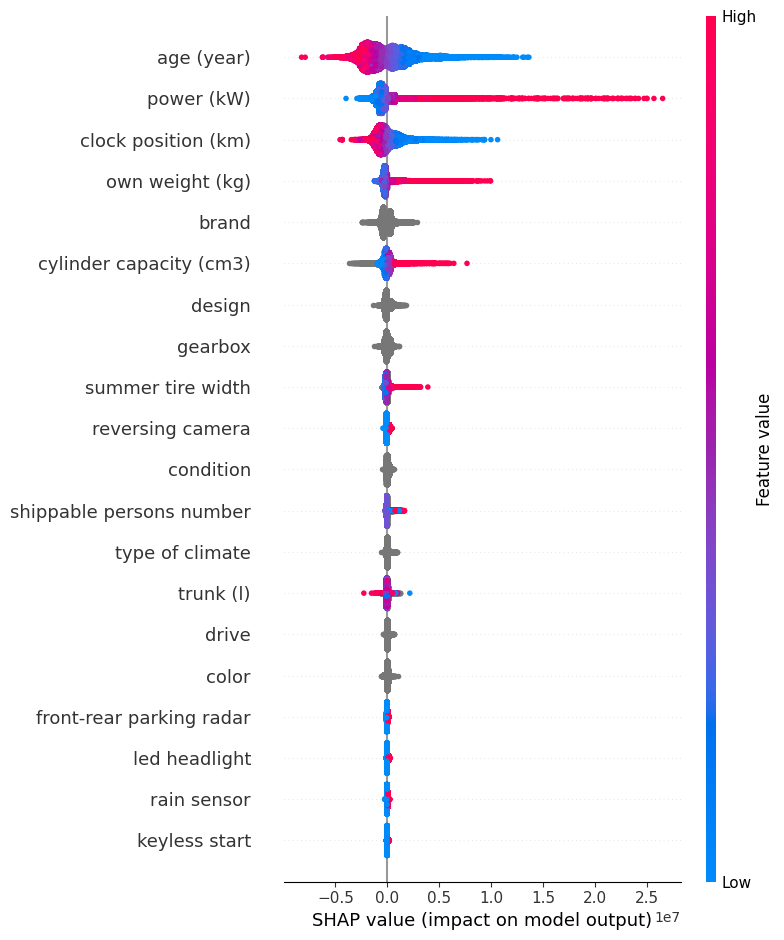

In [15]:
# Create a summary plot
shap.summary_plot(shap_values, df)

In [16]:
shap_values.values

(47976, 42)

In [26]:
model.feature_names_

['has_model_issues',
 'has_current_issues',
 'has_recent_fixes',
 'worth_price',
 'price_adjustment',
 'age (year)',
 'power (kW)',
 'clock position (km)',
 'gearbox',
 'brand',
 'cylinder capacity (cm3)',
 'design',
 'own weight (kg)',
 'drive',
 'summer tire width',
 'reversing camera',
 'condition',
 'trunk (l)',
 'shippable persons number',
 'front-rear parking radar',
 'type of climate',
 'MOT is valid (days)',
 'fuel',
 'electric rear window',
 'keyless start',
 'sliding door',
 'esp (speed stabilizer)',
 'led headlight',
 'rain sensor',
 'financing',
 'city',
 'color',
 'number of doors',
 'spare wheel',
 'heatable window washer nozzles',
 'freshly serviced',
 'double-sided sliding door',
 'tire pressure monitoring system',
 'knee airbag',
 'first placing on the market in Hungary',
 'board computer',
 'heated front seat']

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

has_model_issues


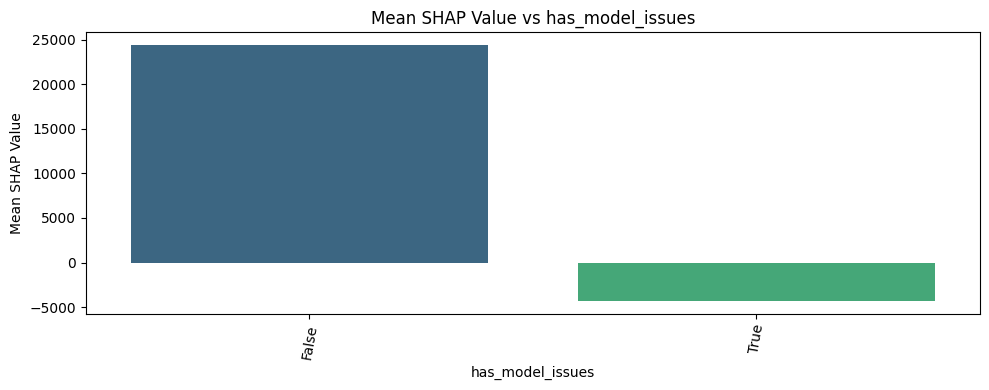

has_current_issues


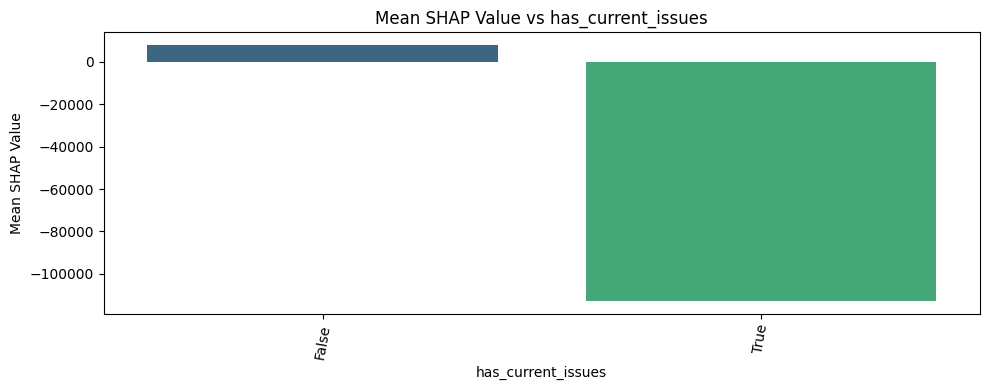

has_recent_fixes


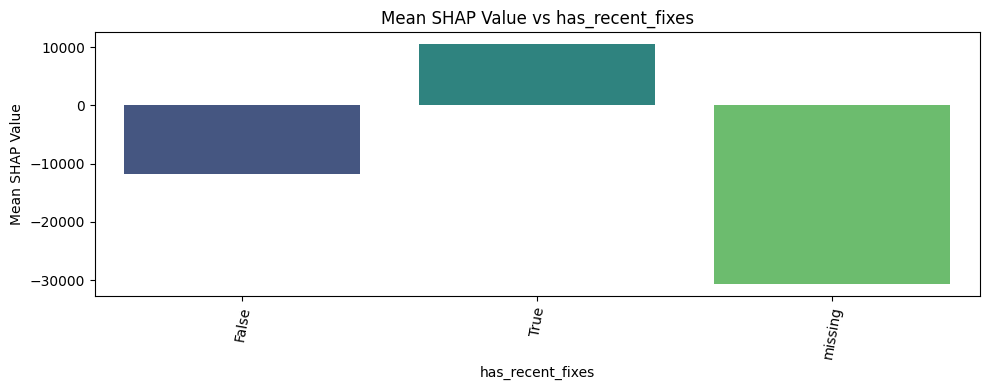

worth_price


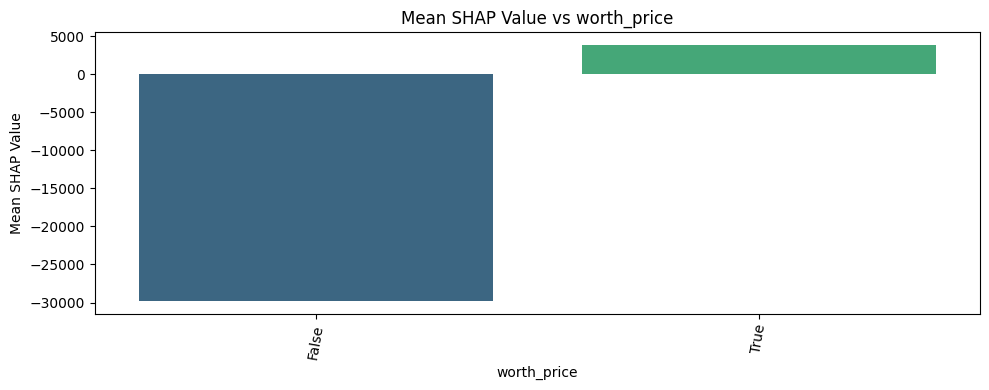

price_adjustment


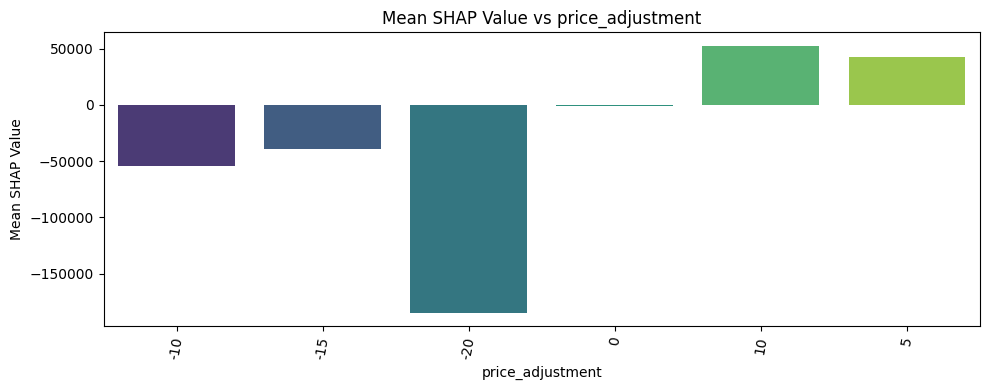

age (year)


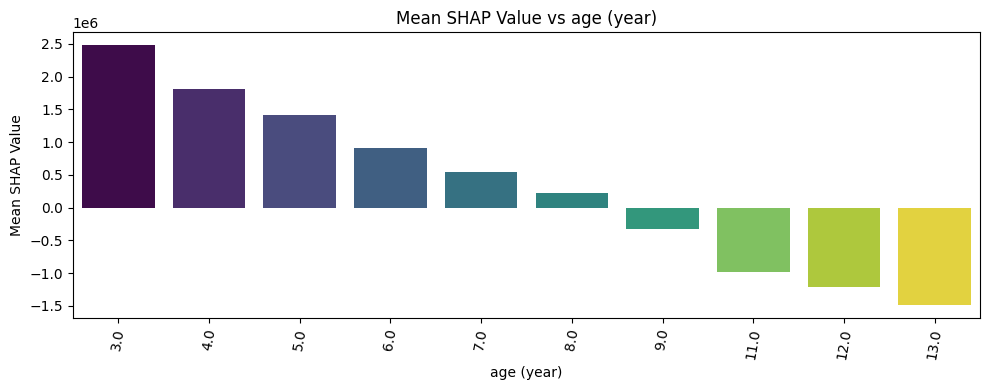

power (kW)


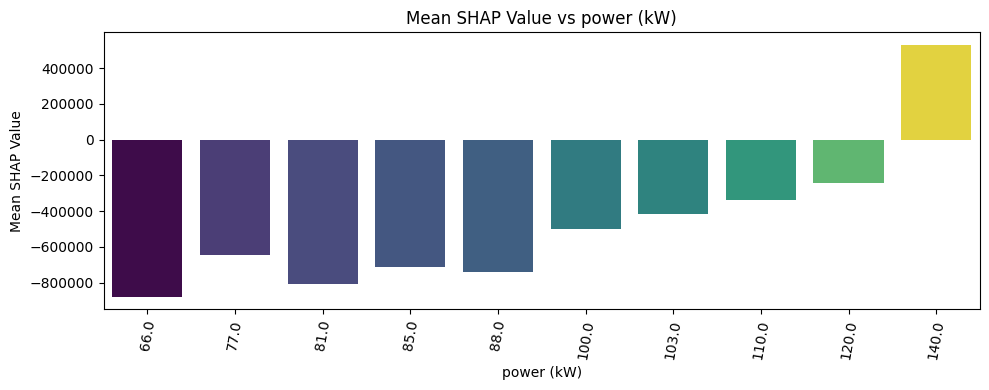

clock position (km)


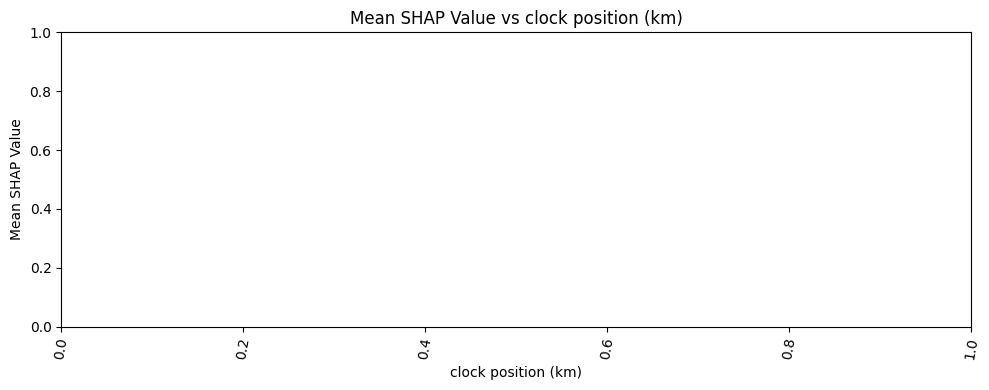

gearbox


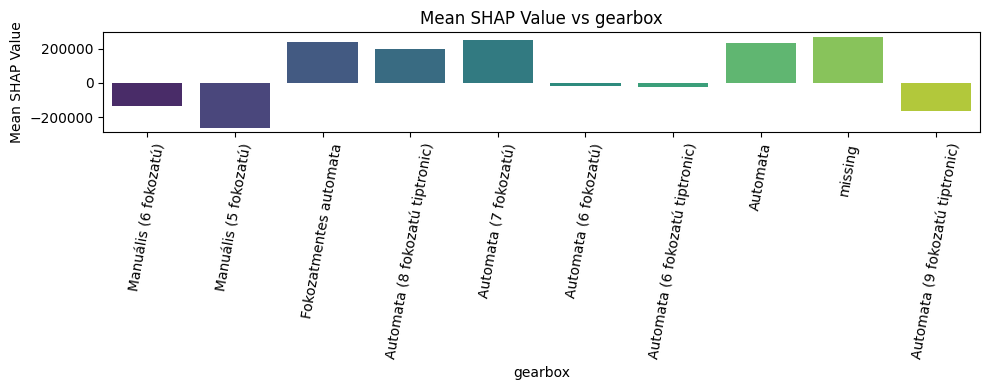

brand


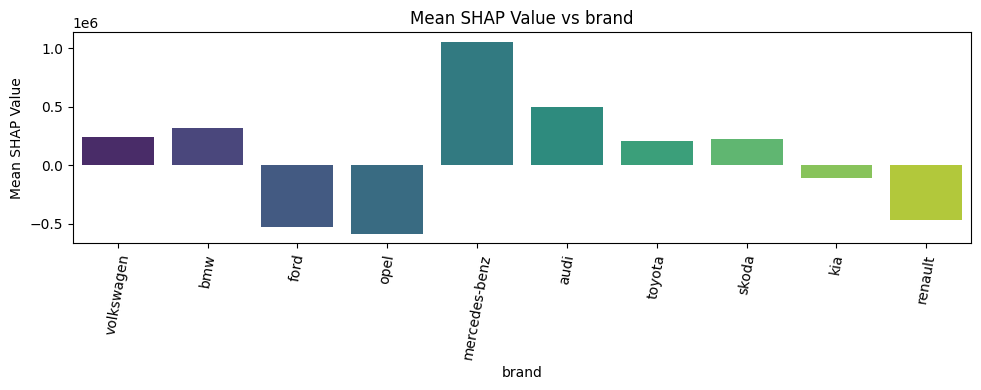

cylinder capacity (cm3)


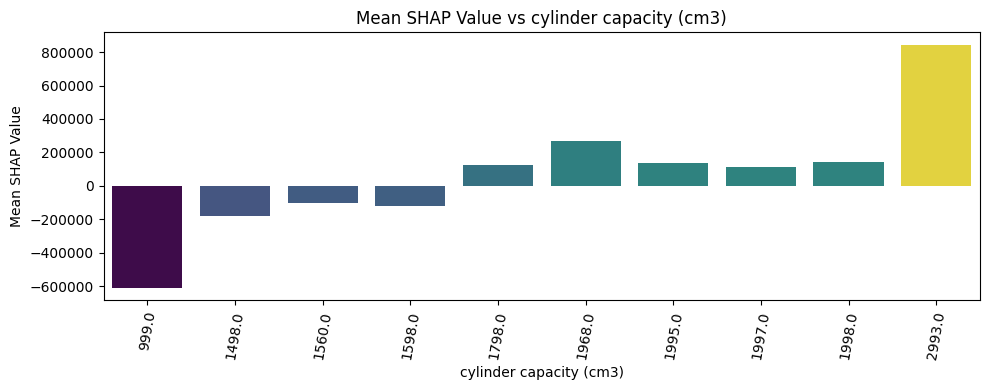

design


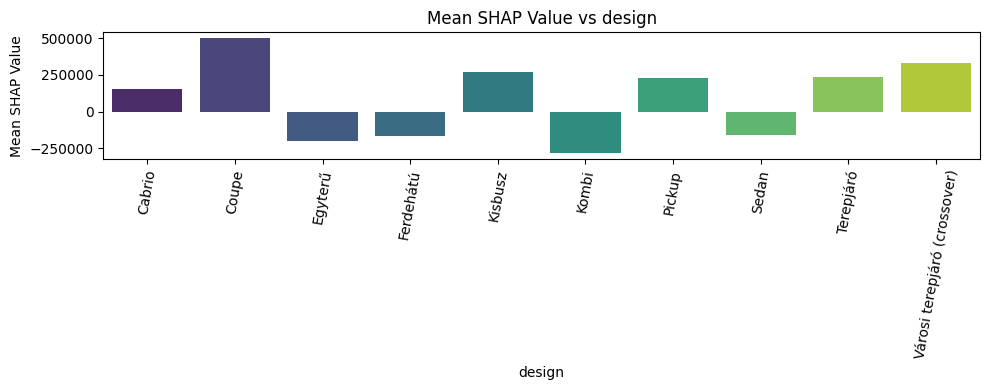

own weight (kg)


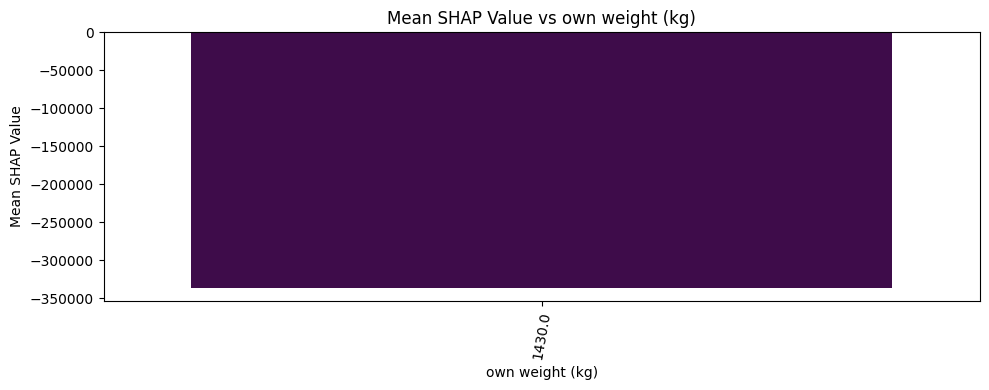

drive


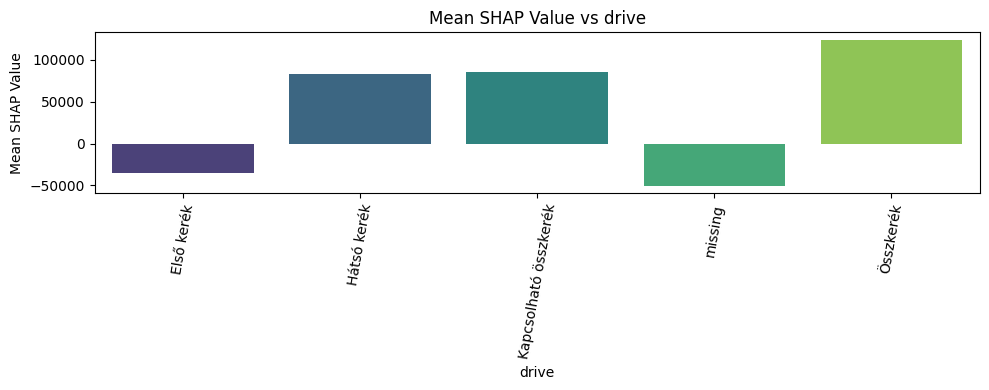

summer tire width


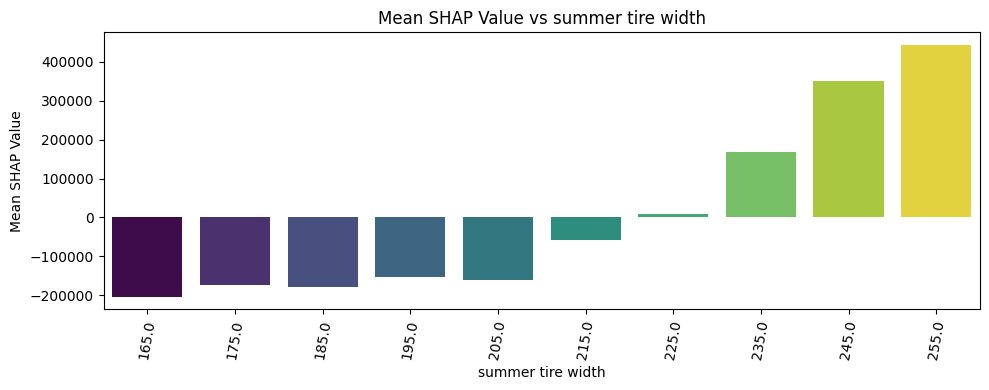

reversing camera


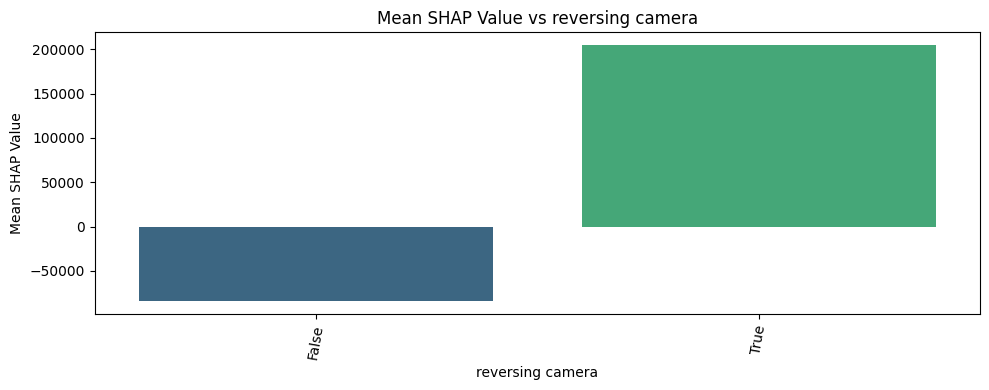

condition


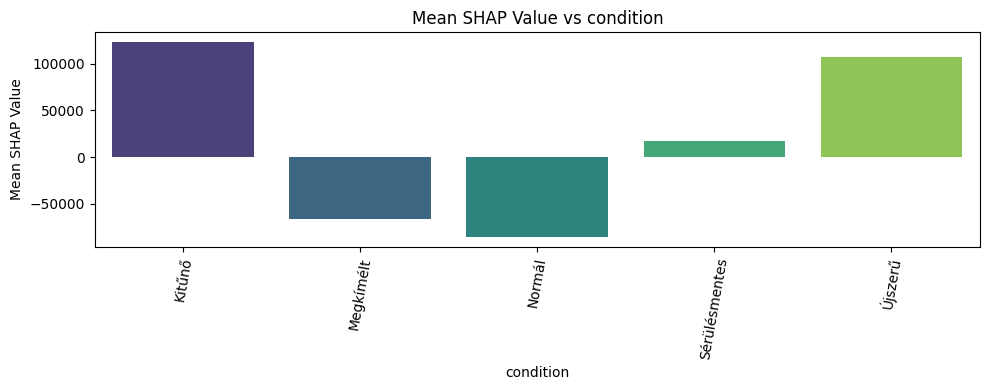

trunk (l)


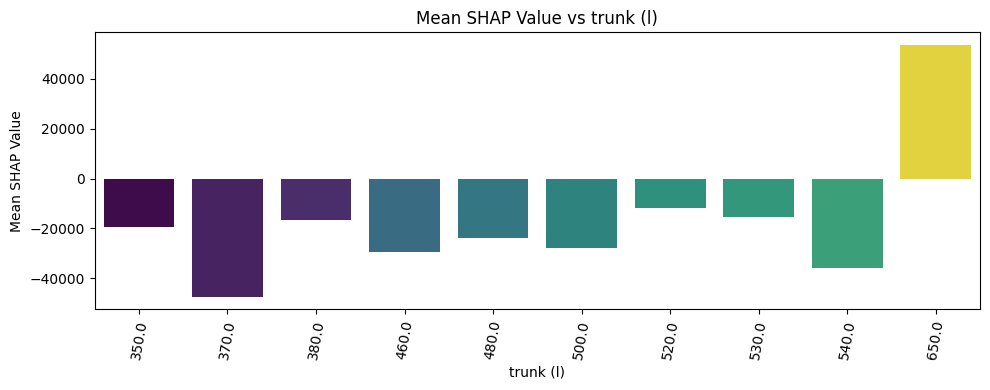

shippable persons number


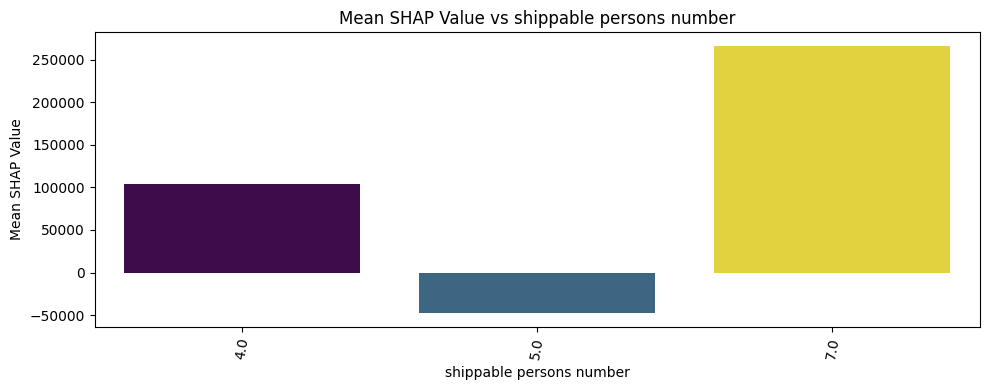

front-rear parking radar


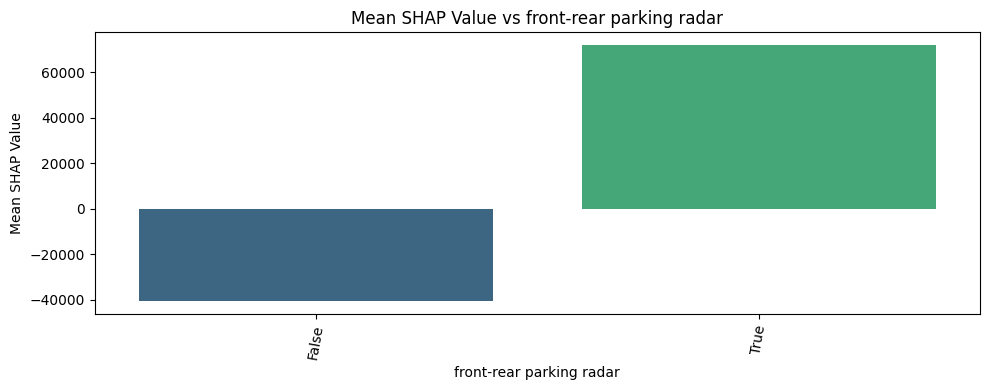

type of climate


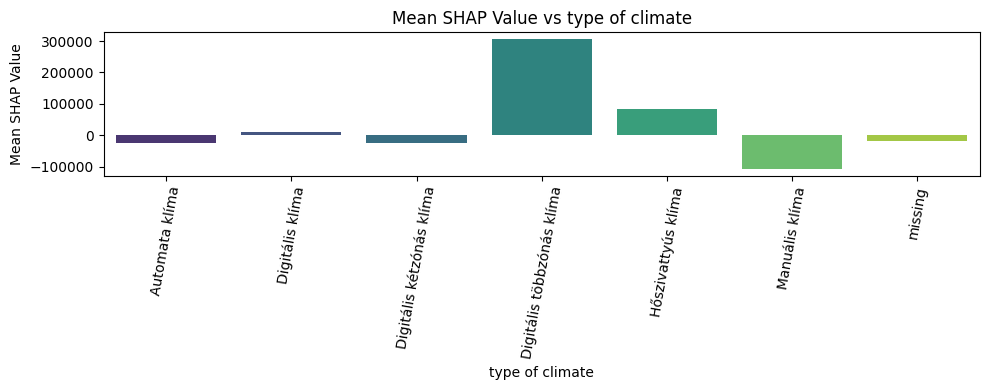

MOT is valid (days)


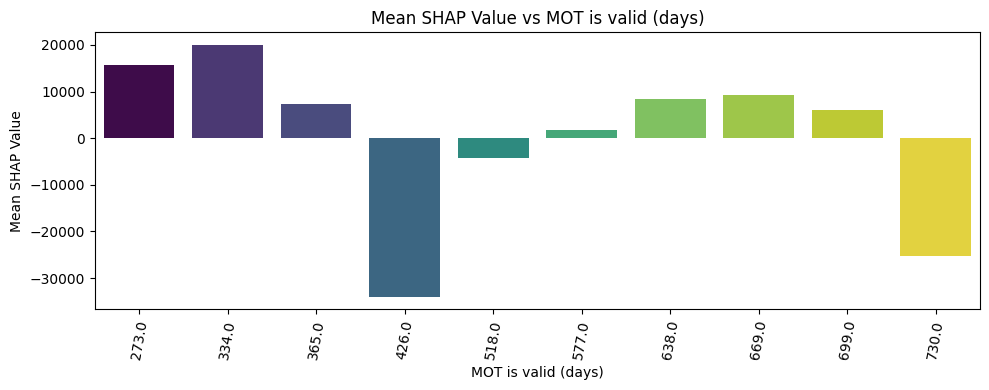

fuel


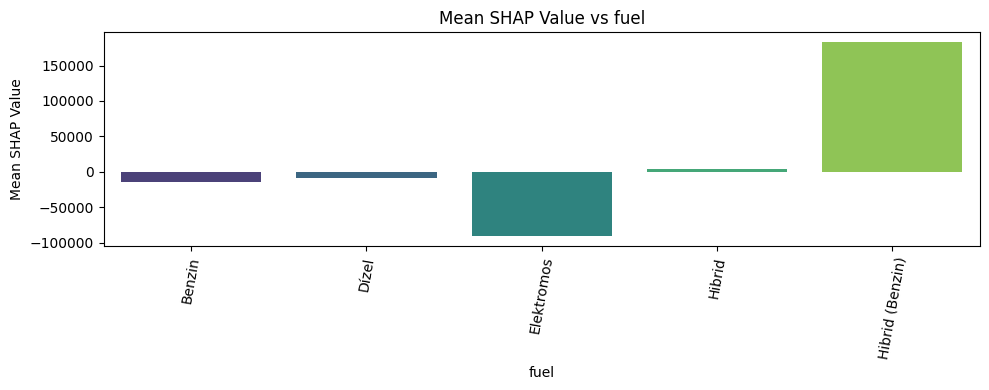

electric rear window


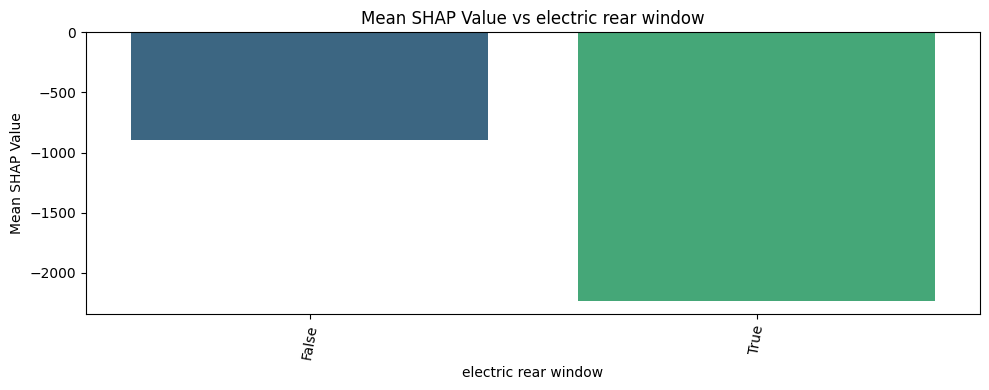

keyless start


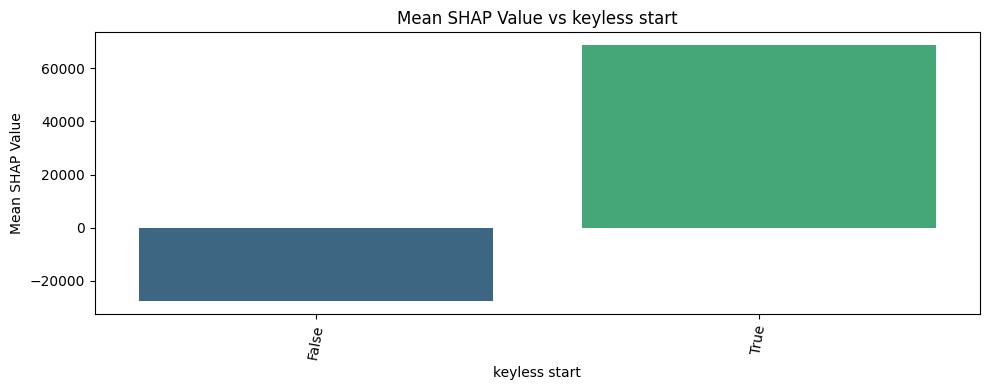

sliding door


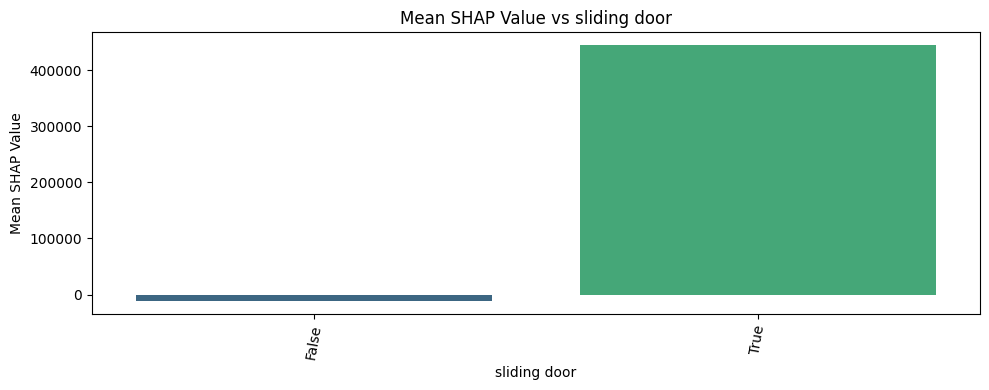

esp (speed stabilizer)


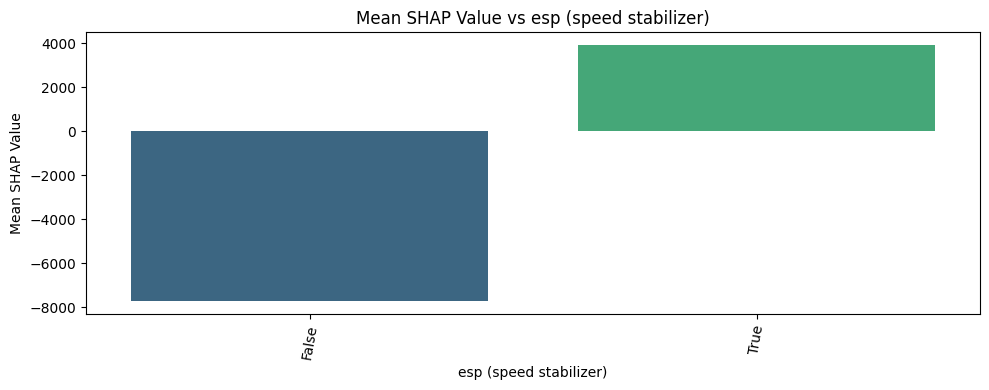

led headlight


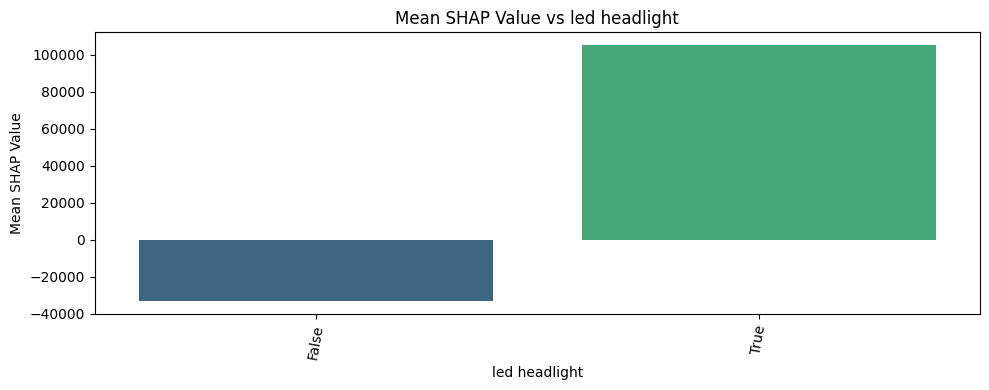

rain sensor


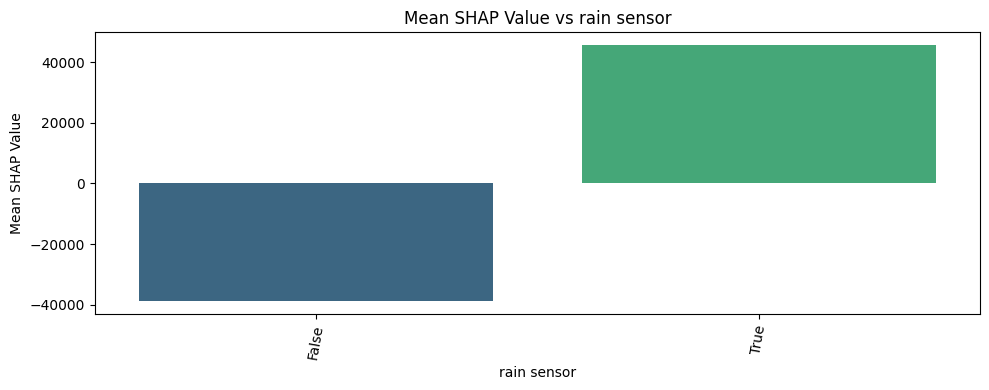

financing


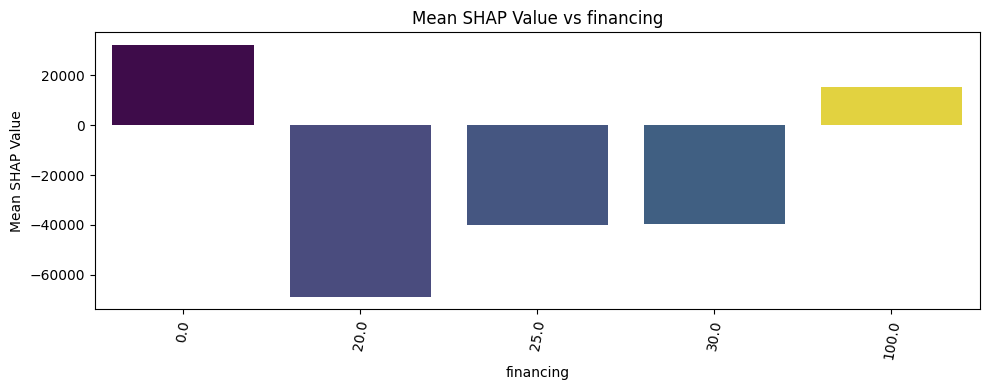

city


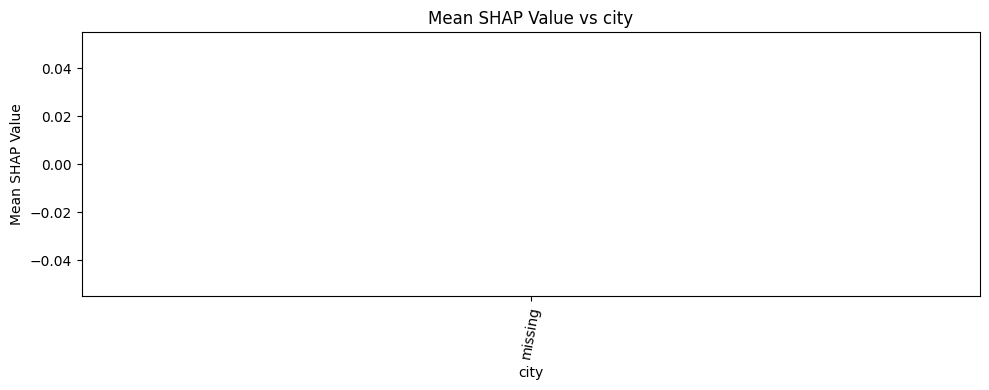

color


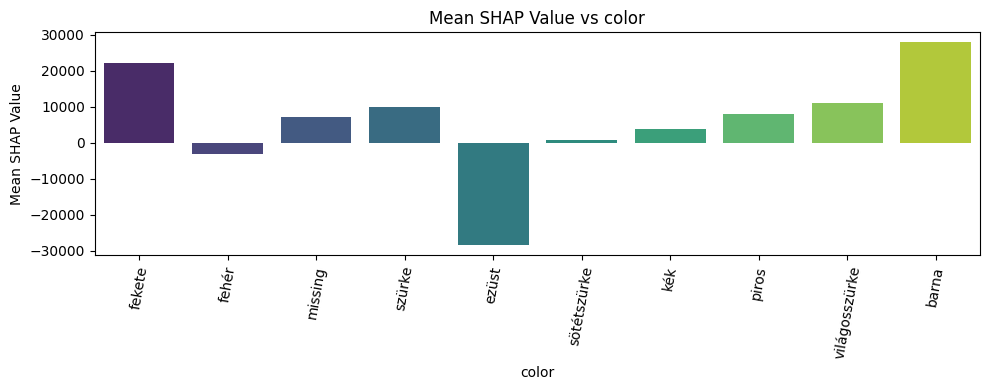

number of doors


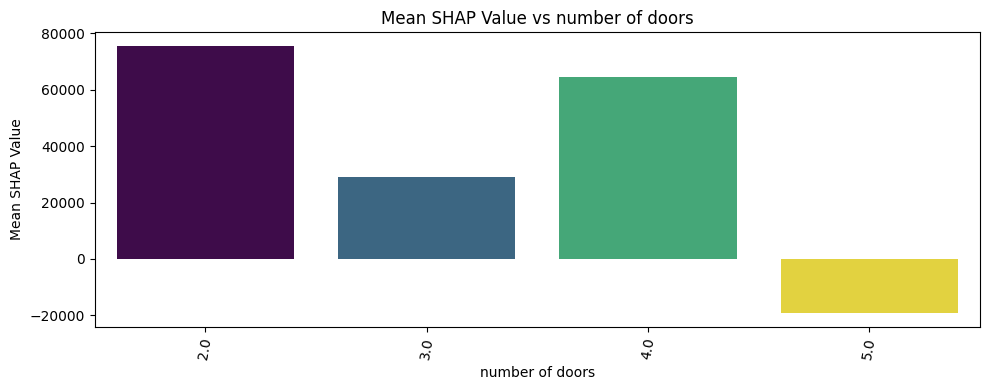

spare wheel


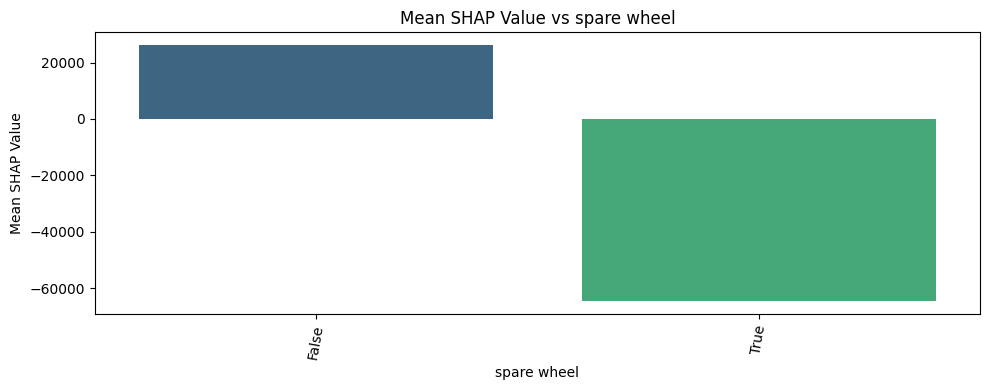

heatable window washer nozzles


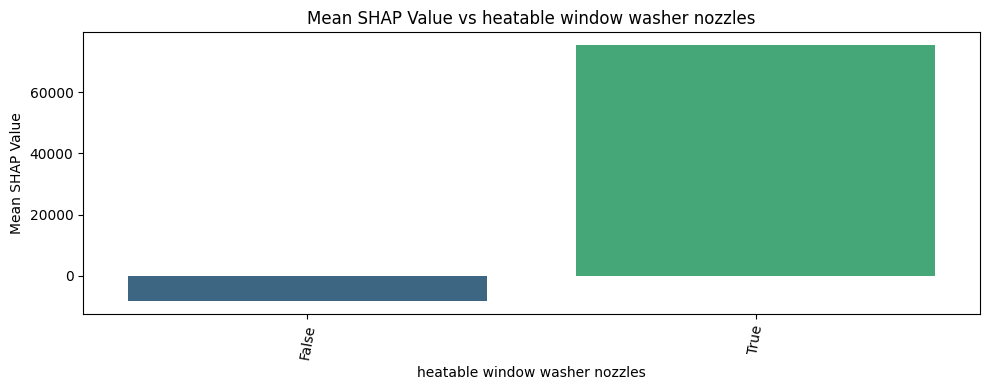

freshly serviced


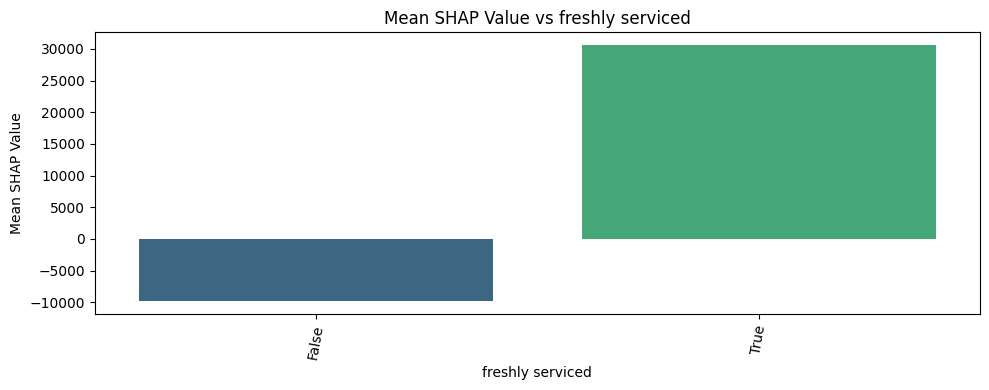

double-sided sliding door


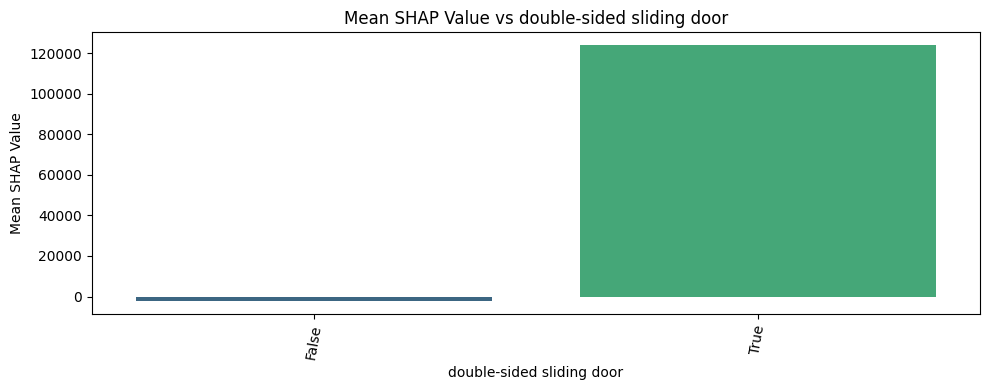

tire pressure monitoring system


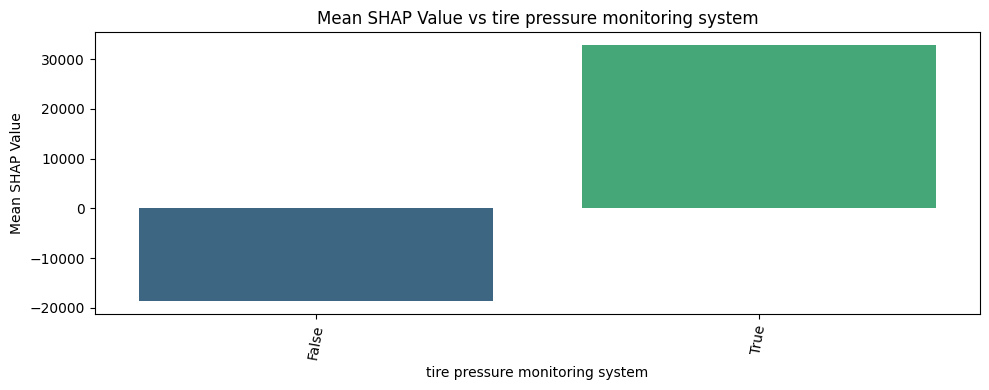

knee airbag


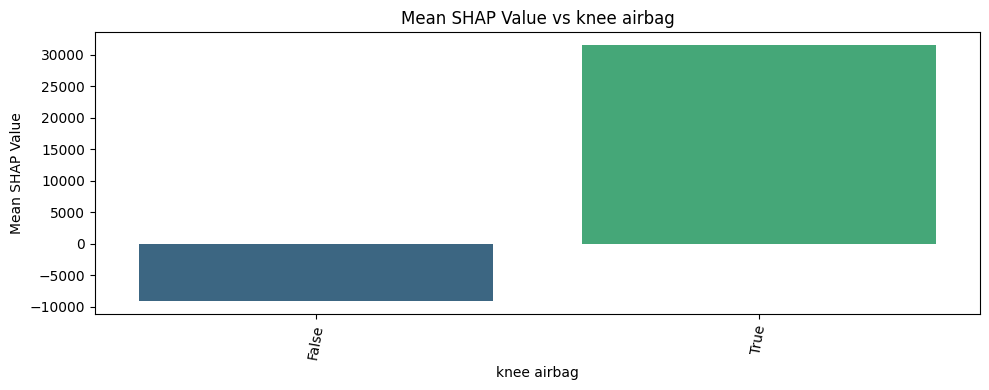

first placing on the market in Hungary


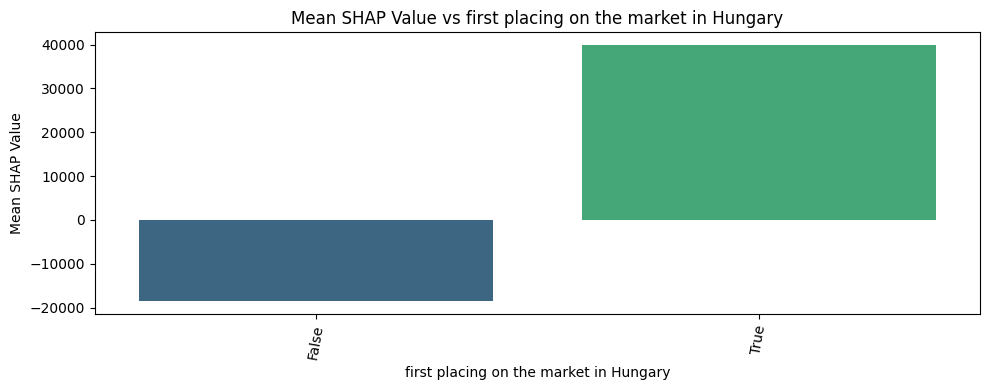

board computer


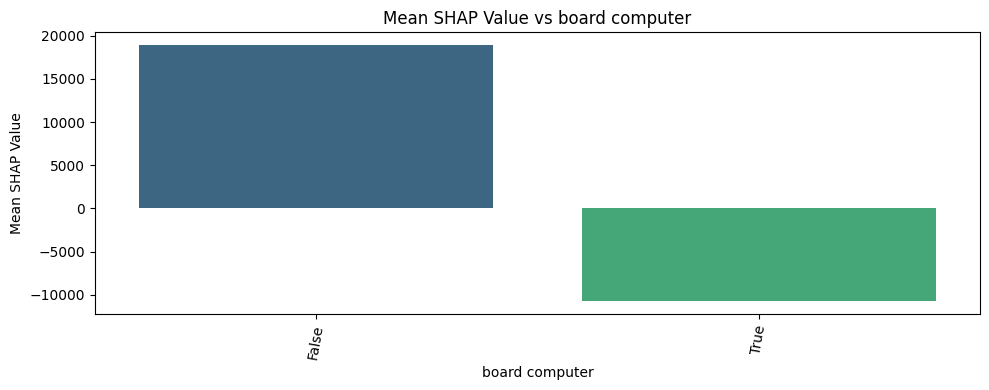

heated front seat


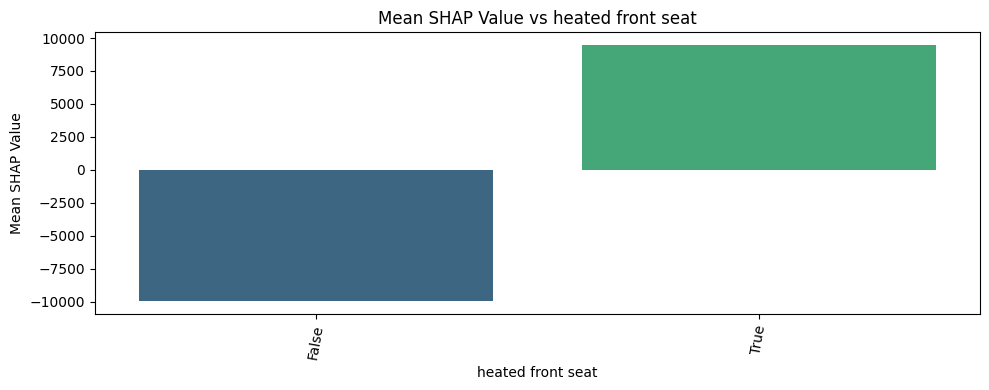

In [36]:
for i, feature in enumerate(model.feature_names_):
    print(feature)
    df_asd = pd.DataFrame({
        'shap': shap_values.values[:, i],
        feature: df[feature].values
    })
    # Group by the feature, calculate mean SHAP value and count
    df_agg = df_asd.groupby(feature).agg(
        shap_mean=('shap', 'mean'),
        count=('shap', 'count')
    ).reset_index()
    # Calculate the percentage of each feature value
    df_agg['percent'] = (df_agg['count'] / df.shape[0]) * 100
    # Filter to include values with at least 1% of the data
    df_agg_filtered = df_agg[df_agg['percent'] >= 1]
    # If more than 10 values, select the top 10 based on count
    if len(df_agg_filtered) > 10:
        df_agg_filtered = df_agg_filtered.sort_values('count', ascending=False).head(10)
    
    # Plotting
    plt.figure(figsize=(10, 4))
    sns.barplot(data=df_agg_filtered, x=feature, y='shap_mean', hue=feature, legend=False, palette='viridis')
    plt.xticks(rotation=80)
    plt.title(f"Mean SHAP Value vs {feature}")
    plt.xlabel(feature)
    plt.ylabel('Mean SHAP Value')
    plt.tight_layout()
    plt.show()

In [19]:
feature_index = 
df_asd = pd.DataFrame({
    'shap': shap_values.values[:,0],
    'issue': df['has_model_issues'].values
})
df_asd.groupby('issue').mean()

SyntaxError: invalid syntax (763722504.py, line 1)

In [22]:
# Select the feature of interest, for example 'FeatureName'
feature = 'age (year)'

# Plot SHAP values for a single feature across all data points
shap.dependence_plot(feature, shap_values.values, df)

TypeError: '<' not supported between instances of 'bool' and 'str'

In [24]:
net = Network(notebook=True, cdn_resources='in_line')

NameError: name 'Network' is not defined

In [213]:
G, communities = create_interactive_graph_with_communities(df_feature_relation2, df_feature_importance, size_column='importance')
G.show_buttons(filter_=['physics'])
G.show("graph.html")

graph.html


In [175]:
flattened_list = [item for sublist in communities for item in sublist]

single_communities = list(set(df_feature_importance['feature']) - set(flattened_list))
total_communities = communities.copy()
for x in single_communities:
    total_communities.append([x])
    
#total_communities

In [199]:
def get_most_important_features(communities, df_feature_importance, min_sum_ratio=0.8):
    most_important_features = []

    for community in communities:
        # Filter the features from this community
        community_feature_importances = df_feature_importance[df_feature_importance['feature'].isin(community)]

        # Sort the features in descending order of importance
        community_feature_importances = community_feature_importances.sort_values(by='importance', ascending=False)

        # Calculate the cumulative importance
        community_feature_importances['cumulative_importance'] = community_feature_importances['importance'].cumsum()

        # Select the most important features, up to 95% of the total importance
        sum_importance = community_feature_importances['importance'].sum()
        min_importance_sum = max(sum_importance * min_sum_ratio, community_feature_importances['cumulative_importance'].min())
        selected_features = community_feature_importances[
            community_feature_importances['cumulative_importance'] <= min_importance_sum
        ]['feature'].tolist()

        most_important_features.extend(selected_features)

    return most_important_features

# Use this function to get the most important features
important_features = get_most_important_features(communities, df_feature_importance)


In [200]:
max_features = 20
df_feature_importance_top_community=df_feature_importance.loc[
    df_feature_importance.feature.isin(important_features), :
].head(max_features)
df_feature_importance_top = df_feature_importance.head(max_features)

In [201]:
def selected_features_train(features):
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]
    categorical_features_selected = [x for x in categorical_features if x in features]
    model = regression_train(X_train_selected, X_test_selected, y_train, y_test, categorical_features_selected)
    
    test_predictions = model.predict(X_test_selected)
    return metrics.r2_score(y_test, test_predictions)

In [202]:
r2_results = []
for i in range(1, len(df_feature_importance_top)+1):
    features = df_feature_importance_top.head(i)['feature'].values
    r2 = selected_features_train(features)
    r2_results.append(r2)

0:	learn: 0.3574437	test: 0.3573802	best: 0.3573802 (0)	total: 6.37ms	remaining: 31.8s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1823002584
bestIteration = 419

Shrink model to first 420 iterations.
0:	learn: 0.3559339	test: 0.3556614	best: 0.3556614 (0)	total: 4.15ms	remaining: 20.8s
1000:	learn: 0.1017989	test: 0.1055630	best: 0.1055630 (1000)	total: 3.31s	remaining: 13.2s


KeyboardInterrupt: 

In [203]:
features_community = df_feature_importance_top_community['feature'].values
r2_community = selected_features_train(features_community)

features_top = df_feature_importance_top['feature'].values
r2_top = selected_features_train(features_top)

0:	learn: 0.3560131	test: 0.3557676	best: 0.3557676 (0)	total: 17.9ms	remaining: 1m 29s
1000:	learn: 0.0703310	test: 0.0787208	best: 0.0787208 (1000)	total: 10.3s	remaining: 41.1s
2000:	learn: 0.0659965	test: 0.0776318	best: 0.0776318 (2000)	total: 20.1s	remaining: 30.1s
3000:	learn: 0.0635448	test: 0.0770676	best: 0.0770665 (2996)	total: 29.9s	remaining: 19.9s
4000:	learn: 0.0616569	test: 0.0767594	best: 0.0767594 (4000)	total: 39.9s	remaining: 9.96s
4999:	learn: 0.0603372	test: 0.0765440	best: 0.0765429 (4985)	total: 49.9s	remaining: 0us

bestTest = 0.07654291787
bestIteration = 4985

Shrink model to first 4986 iterations.
0:	learn: 0.3560795	test: 0.3557966	best: 0.3557966 (0)	total: 10.3ms	remaining: 51.3s
1000:	learn: 0.0594962	test: 0.0678868	best: 0.0678868 (1000)	total: 11.9s	remaining: 47.7s
2000:	learn: 0.0541335	test: 0.0660241	best: 0.0660230 (1998)	total: 23.8s	remaining: 35.7s
3000:	learn: 0.0514358	test: 0.0653499	best: 0.0653499 (3000)	total: 35.7s	remaining: 23.8s
4000

In [179]:
r2_top_community

0.9358542048904865

In [180]:
r2_top

0.9544455487330908

In [204]:
set(features_community) - set(features_top)

{'automatically dimming interior mirror',
 'buy_from_shop',
 'curtain airbag',
 'electrically folding exterior mirrors',
 'electronic parking brake',
 'keyless start',
 'tfidf_electronic',
 'tfidf_window',
 'word_count'}

In [205]:
set(features_top) - set(features_community)

{'MOT is valid (days)',
 'clock position (km)',
 'condition',
 'summer tire width',
 'summer tires aspect ratio',
 'summer tires rim diameter',
 'total weight (kg)',
 'trunk (l)',
 'type of climate'}